In [4]:
import torch as t
%matplotlib inline
#这个inline可以使得不用plt.show就可以把图像画出来
from matplotlib import pyplot as plt
from IPython import display

In [14]:
#设置随机种子，达到一种伪随即的状态，在不同的电脑上也能有同样的输出

t.manual_seed(1000)
#t.rand生成是均匀分布，而randn是正态分布
def get_fake_data(batch_size=8):
    '''产生随即数据：y=x*2+3,加上一些噪声'''
    x = t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y

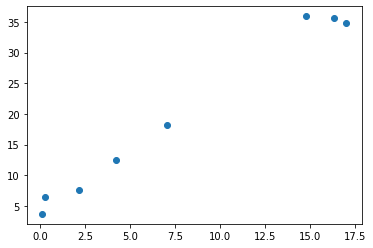

In [76]:
x,y = get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

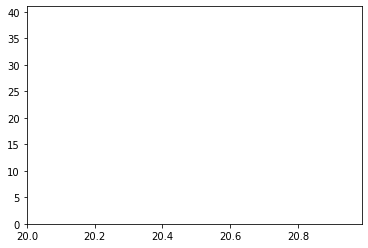

2.0555081367492676 3.0358669757843018


In [114]:
#随即初始化一个w和b
w=t.rand(1,1)
b=t.zeros(1,1)

#学习率
lr =0.001

for i in range(20000):
    x,y=get_fake_data()
    
    #前传，计算loss
    y_pred = x.mm(w)+b.expand_as(y)
    loss = 0.5*(y_pred-y)**2
    loss = loss.sum
    
    #反向：手动计算梯度
    dloss = 1
    dy_pred = dloss*(y_pred-y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    #更新参数
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if i%1000 ==0:
        display.clear_output(wait=True)
        x = t.arange(0,20).view(-1,1)
        x=x.float()
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.numpy(),y.numpy()) #预测
        
        x2,y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.squeeze().numpy(),y2.squeeze().numpy())
        
        plt.xlim(20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
        
        print(w.item(),b.item())